In [1]:
from __future__ import print_function

from time import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
n_samples, h, w = lfw_people.images.shape

In [4]:
X = lfw_people.data

In [5]:
X.shape

(1288, 1850)

In [6]:
def plot_gallery(images,h, w, n_row=3, n_col=4):
        """Helper function to plot a gallery of portraits"""
        plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_row * n_col):
            plt.subplot(n_row, n_col, i + 1)
            plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
            #plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())

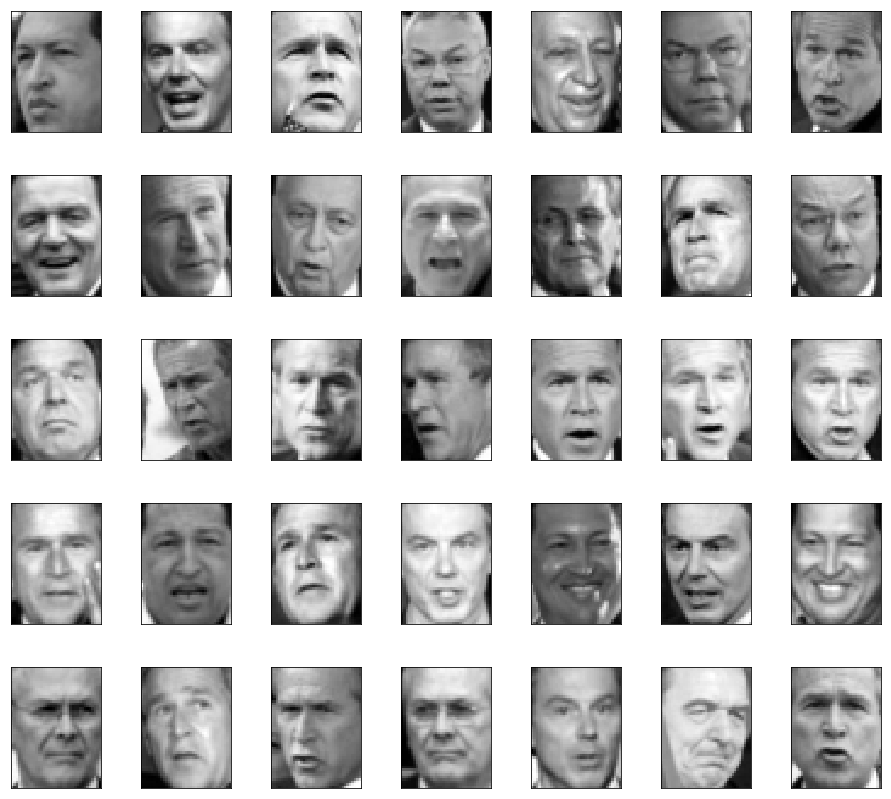

In [7]:
plot_gallery(X,h,w,n_row=5,n_col=7)

In [8]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X.shape[0]))
t0 = time()
pca = PCA(n_components=n_components).fit(X)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()

print("done in %0.3fs" % (time() - t0))

Extracting the top 150 eigenfaces from 1288 faces
done in 0.577s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.000s


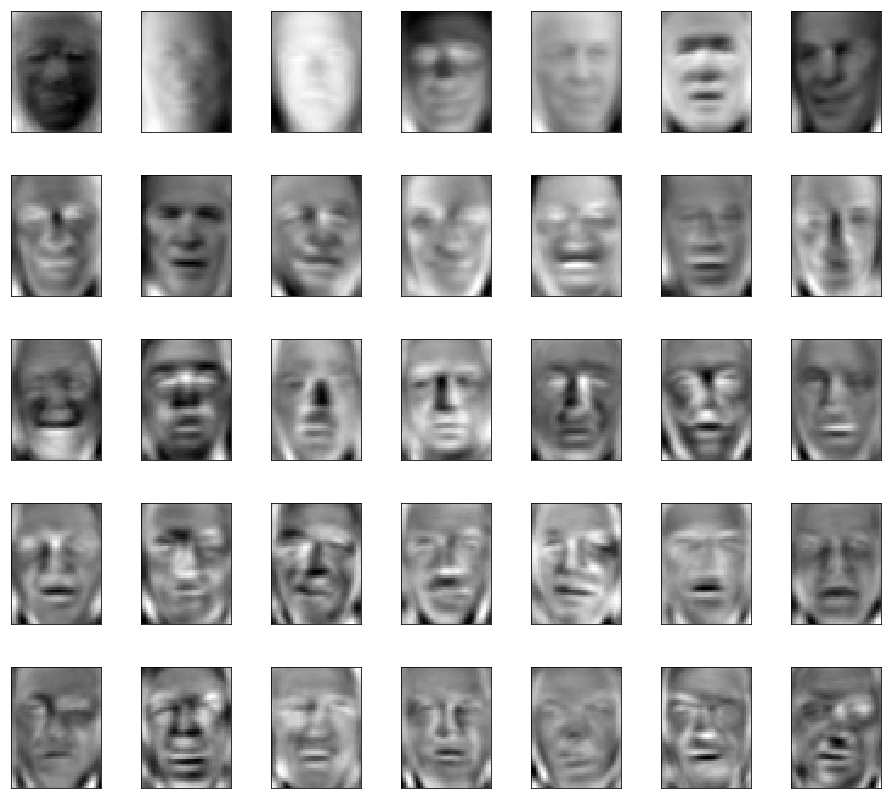

In [9]:
plot_gallery(eigenfaces,h,w,n_row=5,n_col=7)

In [10]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    df = pd.DataFrame(columns=('time','inertia','homo','compl','v-meas','ARI','AMI','silhouette'))
    incr_time = (time() - t0)
    df.loc[0] = (incr_time , estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size))
    #print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
    #      % (name, (time() - t0), estimator.inertia_,
    #         metrics.homogeneity_score(labels, estimator.labels_),
    #         metrics.completeness_score(labels, estimator.labels_),
    #         metrics.v_measure_score(labels, estimator.labels_),
    #         metrics.adjusted_rand_score(labels, estimator.labels_),
    #         metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
    #         metrics.silhouette_score(data, estimator.labels_,
    #                                  metric='euclidean',
    #                                  sample_size=sample_size)))
    pd.set_option('display.expand_frame_repr', False)
    print(df)

In [11]:
labels = lfw_people.target
sample_size = 200

print(79 * '_')

#print('% 9s' % 'init time  inertia    homo   compl  v-meas     ARI AMI  silhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=18, n_init=10),
              name="k-means++", data=X)

bench_k_means(KMeans(init='random', n_clusters=18, n_init=10),
              name="random", data=X)

bench_k_means(KMeans(init=pca.components_[0:18,], n_clusters=18, n_init=1),
              name="PCA-based",
              data=X)
print(79 * '_')

_______________________________________________________________________________
      time       inertia      homo     compl    v-meas       ARI       AMI  silhouette
0  3.10944  2.124210e+09  0.075874  0.044555  0.056142  0.013848  0.030562    0.027299
       time       inertia      homo    compl    v-meas       ARI       AMI  silhouette
0  2.304096  2.120181e+09  0.077338  0.04595  0.057649  0.015181  0.031747    0.040166
       time       inertia      homo     compl    v-meas       ARI       AMI  silhouette
0  0.373082  2.133291e+09  0.086715  0.052077  0.065074  0.016781  0.038281    0.034818
_______________________________________________________________________________


Para ver el significado de cada una de las medidas, consultad: http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation